In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('mai-ml-lab-2/train.csv')
test  = pd.read_csv('mai-ml-lab-2/test.csv')

display(train.info())
display(test.info())

print('Train duplication: ', train.duplicated().sum())
print('Test duplication: ', test.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  int64  
 1   age                  15000 non-null  float64
 2   height(cm)           15000 non-null  float64
 3   weight(kg)           15000 non-null  float64
 4   waist(cm)            15000 non-null  float64
 5   eyesight(left)       15000 non-null  float64
 6   eyesight(right)      15000 non-null  float64
 7   hearing(left)        15000 non-null  float64
 8   hearing(right)       15000 non-null  float64
 9   systolic             15000 non-null  float64
 10  relaxation           15000 non-null  float64
 11  fasting blood sugar  15000 non-null  float64
 12  Cholesterol          15000 non-null  float64
 13  triglyceride         15000 non-null  float64
 14  HDL                  15000 non-null  float64
 15  LDL                  15000 non-null 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   height(cm)           10000 non-null  float64
 3   weight(kg)           10000 non-null  float64
 4   waist(cm)            10000 non-null  float64
 5   eyesight(left)       10000 non-null  float64
 6   eyesight(right)      10000 non-null  float64
 7   hearing(left)        10000 non-null  float64
 8   hearing(right)       10000 non-null  float64
 9   systolic             10000 non-null  float64
 10  relaxation           10000 non-null  float64
 11  fasting blood sugar  10000 non-null  float64
 12  Cholesterol          10000 non-null  float64
 13  triglyceride         10000 non-null  float64
 14  HDL                  10000 non-null  float64
 15  LDL                  10000 non-null  

None

Train duplication:  0
Test duplication:  0


In [3]:
print(f"Train shape: {train.shape}")
print(f"Test  shape: {test.shape}")
print("Columns in train:", train.columns.tolist())

Train shape: (15000, 24)
Test  shape: (10000, 23)
Columns in train: ['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking']


In [4]:
features = list(set(train.columns) - {'id', 'smoking'})

df_all = pd.concat([train[features], test[features]], axis=0)

In [5]:
print('Duplicated rows between train and test datasets: ', df_all.duplicated().sum())

Duplicated rows between train and test datasets:  0


In [6]:
display(train.head(5))
train.info()
display(train.describe())

id   age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0  55.0       150.0        50.0       73.0             0.8   
1   1  50.0       160.0        60.0       79.6             1.0   
2   2  55.0       145.0        50.0       73.0             1.2   
3   3  40.0       175.0        80.0       83.2             0.9   
4   4  30.0       170.0        70.0       79.5             1.2   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...   HDL    LDL  \
0              1.0            1.0             1.0     122.0  ...  62.0  113.0   
1              0.8            1.0             1.0     124.0  ...  74.0  112.0   
2              1.2            1.0             1.0     110.0  ...  66.0  123.0   
3              1.0            1.0             1.0      99.0  ...  38.0  114.0   
4              1.2            1.0             1.0     119.0  ...  49.0  148.0   

   hemoglobin  Urine protein  serum creatinine   AST   ALT   Gtp  \
0        12.0            1.0               0.6  22.0  21.0  12.0   
1        14.1            1.0               0.9  19.0  14.0  17.0   
2        13.3            1.0               0.6  15.0  12.0  13.0   
3        16.1            1.0               1.0  22.0  13.0  20.0   
4        15.5            1.0               1.2  18.0  19.0  25.0   

   dental caries  smoking  
0            0.0      0.0  
1            0.0      0.0  
2            0.0      0.0  
3            0.0      1.0  
4            0.0      1.0  

[5 rows x 24 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  int64  
 1   age                  15000 non-null  float64
 2   height(cm)           15000 non-null  float64
 3   weight(kg)           15000 non-null  float64
 4   waist(cm)            15000 non-null  float64
 5   eyesight(left)       15000 non-null  float64
 6   eyesight(right)      15000 non-null  float64
 7   hearing(left)        15000 non-null  float64
 8   hearing(right)       15000 non-null  float64
 9   systolic             15000 non-null  float64
 10  relaxation           15000 non-null  float64
 11  fasting blood sugar  15000 non-null  float64
 12  Cholesterol          15000 non-null  float64
 13  triglyceride         15000 non-null  float64
 14  HDL                  15000 non-null  float64
 15  LDL                  15000 non-null 

id           age    height(cm)    weight(kg)     waist(cm)  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean    7499.500000     42.606000    164.672667     64.282000     80.323180   
std     4330.271354     10.415341      8.558684     10.973871      7.932701   
min        0.000000     20.000000    140.000000     35.000000      0.900000   
25%     3749.750000     40.000000    160.000000     55.000000     75.000000   
50%     7499.500000     40.000000    165.000000     65.000000     80.000000   
75%    11249.250000     50.000000    170.000000     70.000000     86.000000   
max    14999.000000     80.000000    190.000000    120.000000    121.000000   

       eyesight(left)  eyesight(right)  hearing(left)  hearing(right)  \
count    15000.000000     15000.000000   15000.000000    15000.000000   
mean         1.032727         1.025927       1.005533        1.004933   
std          0.312845         0.313488       0.074183        0.070067   
min          0.100000         0.100000       1.000000        1.000000   
25%          0.800000         0.800000       1.000000        1.000000   
50%          1.000000         1.000000       1.000000        1.000000   
75%          1.200000         1.200000       1.000000        1.000000   
max          9.900000         9.900000       2.000000        2.000000   

           systolic  ...           HDL           LDL    hemoglobin  \
count  15000.000000  ...  15000.000000  15000.000000  15000.000000   
mean     119.149467  ...     57.535667    113.158533     14.510340   
std       11.167046  ...     11.380739     18.442012      1.392921   
min       82.000000  ...     28.000000     41.000000      7.200000   
25%      110.000000  ...     49.000000    100.000000     13.500000   
50%      119.000000  ...     56.000000    112.000000     14.700000   
75%      128.000000  ...     65.000000    126.000000     15.600000   
max      190.000000  ...    105.000000    193.000000     28.900000   

       Urine protein  serum creatinine           AST           ALT  \
count   15000.000000      15000.000000  15000.000000  15000.000000   
mean        1.016533          0.866580     22.272667     20.874933   
std         0.157464          0.168492      6.324422     10.314009   
min         1.000000          0.100000      9.000000      4.000000   
25%         1.000000          0.800000     18.000000     14.000000   
50%         1.000000          0.900000     21.000000     18.000000   
75%         1.000000          1.000000     25.000000     24.000000   
max         5.000000          1.600000    324.000000    190.000000   

                Gtp  dental caries       smoking  
count  15000.000000   15000.000000  15000.000000  
mean      26.290200       0.139467      0.366600  
std       20.431882       0.346444      0.481892  
min        6.000000       0.000000      0.000000  
25%       15.000000       0.000000      0.000000  
50%       21.000000       0.000000      0.000000  
75%       31.000000       0.000000      1.000000  
max      566.000000       1.000000      1.000000  

[8 rows x 24 columns]

In [7]:
missing = train.isnull().sum().sort_values(ascending=False)
print("Пропуски в train:")
print(missing[missing > 0])

Пропуски в train:
Series([], dtype: int64)


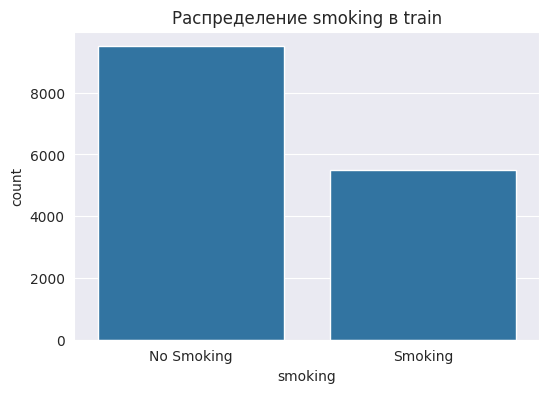

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='smoking', data=train)
plt.title('Распределение smoking в train')
plt.xticks(ticks=[0, 1], labels=['No Smoking', 'Smoking'])
plt.ylabel('count')
plt.show()

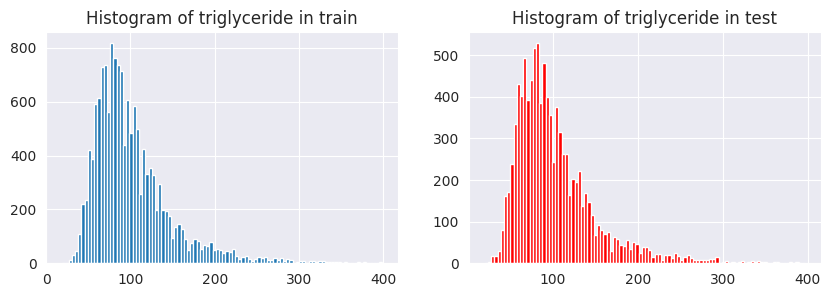

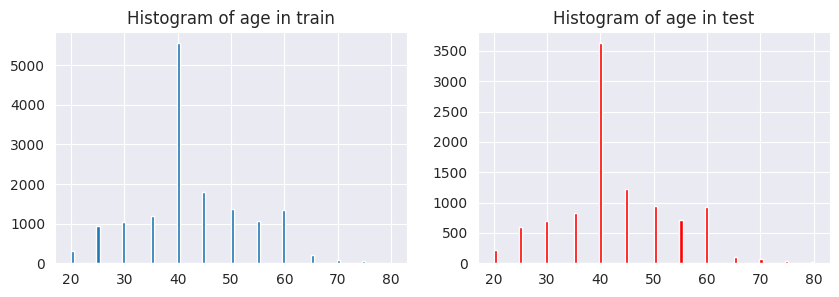

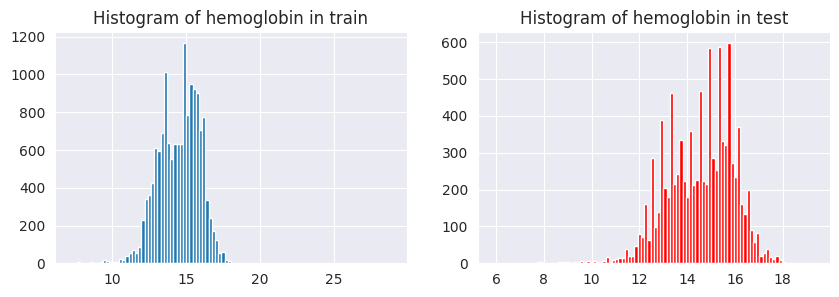

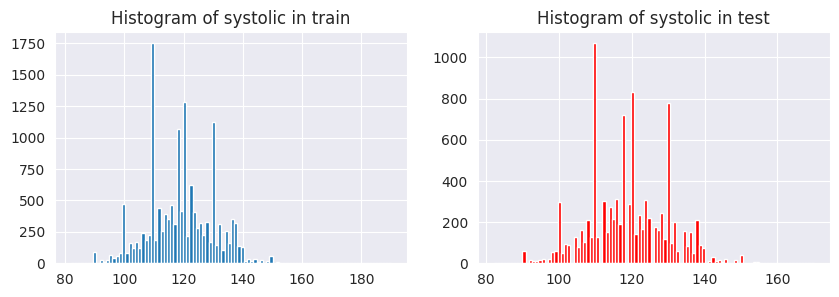

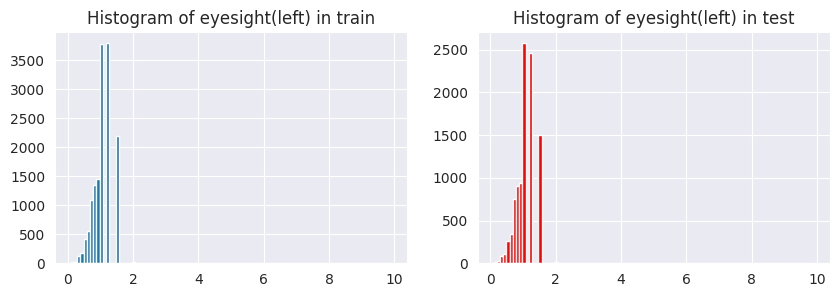

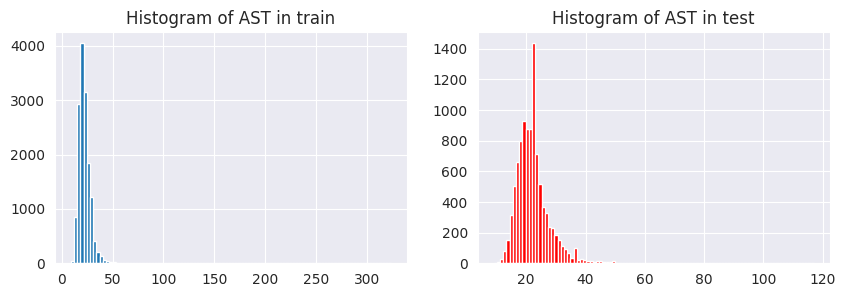

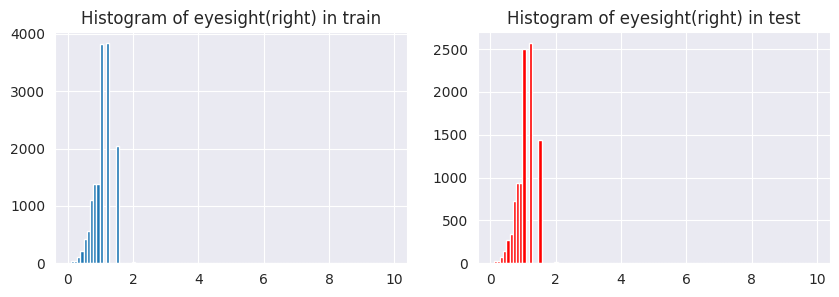

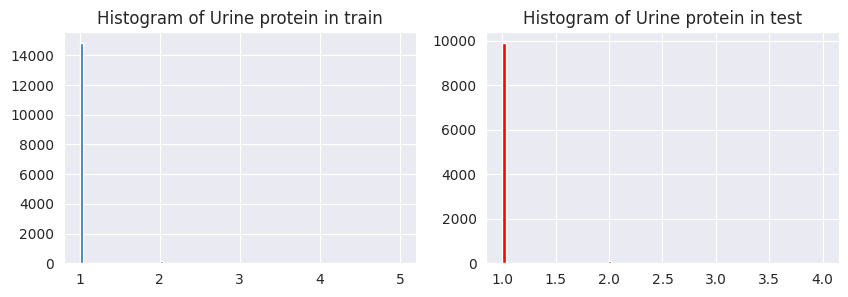

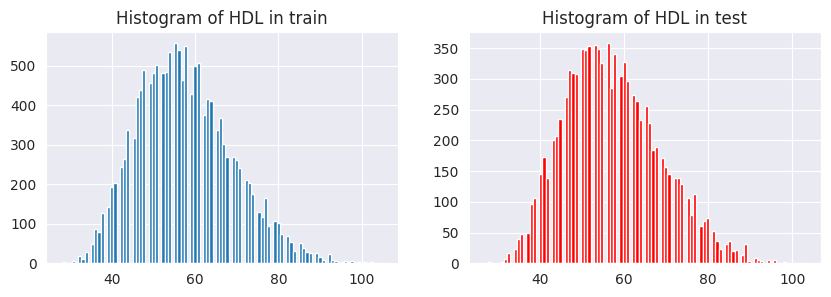

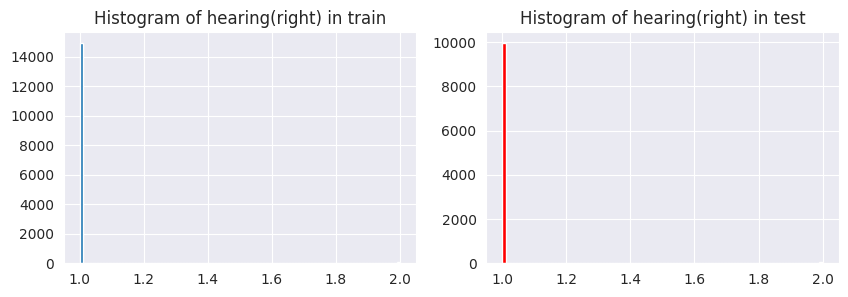

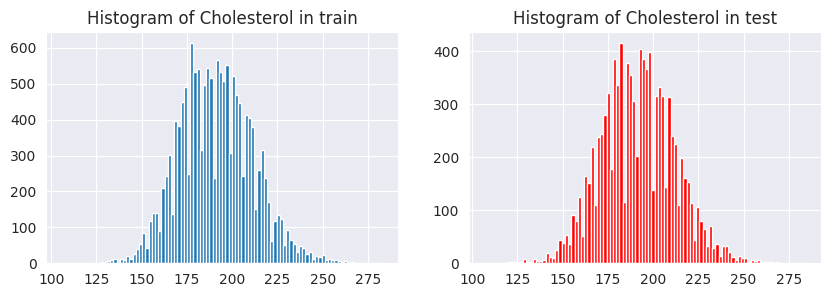

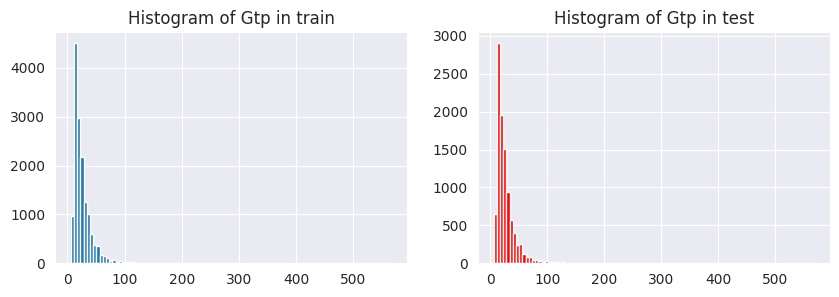

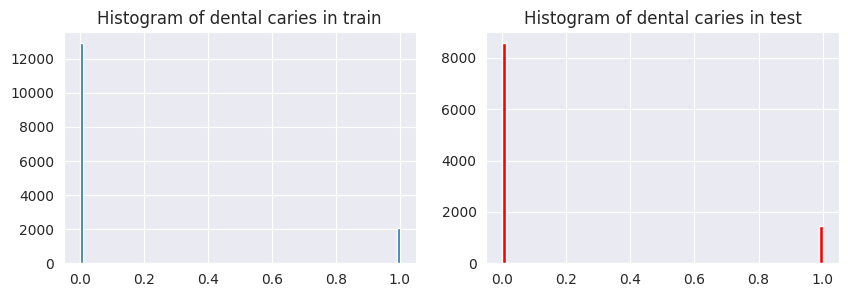

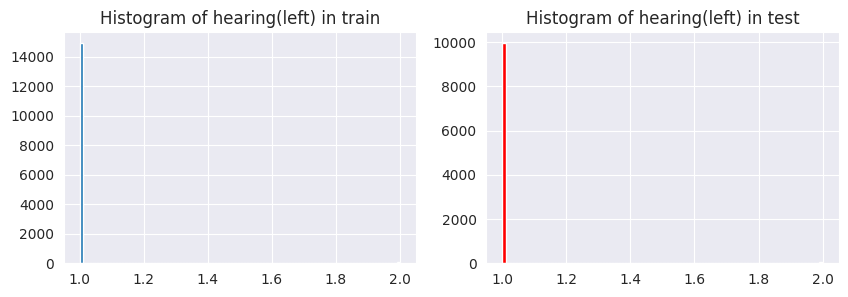

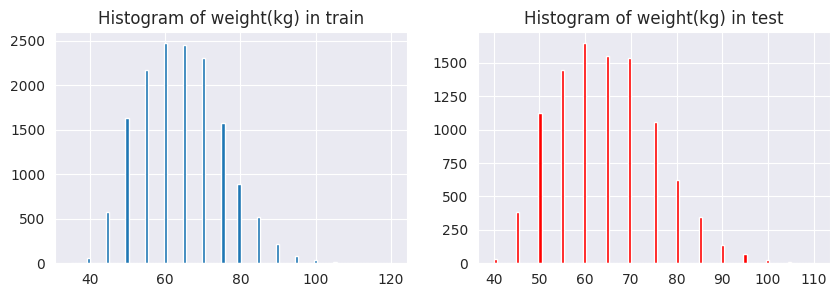

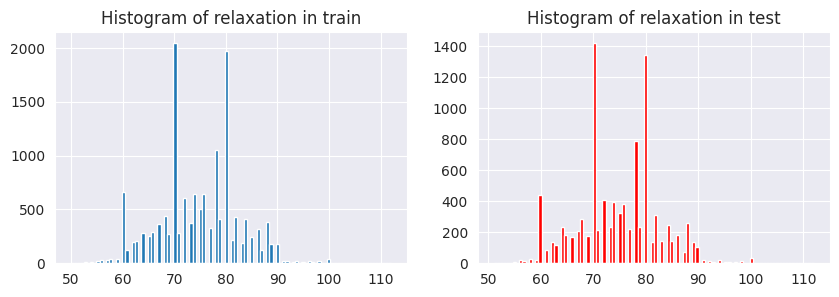

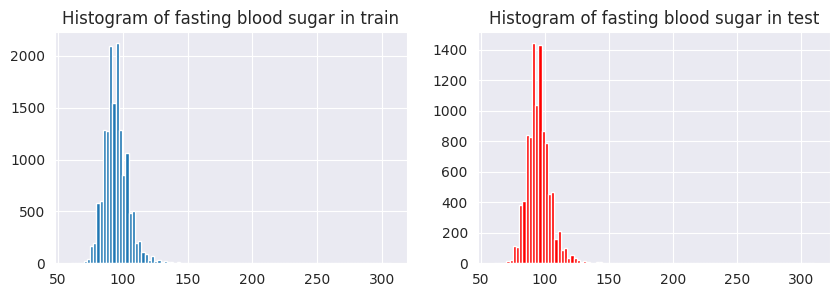

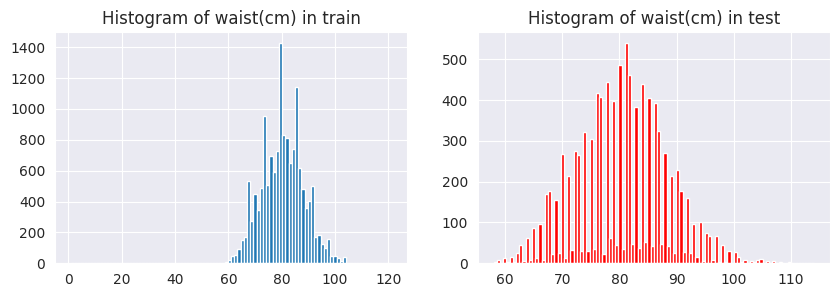

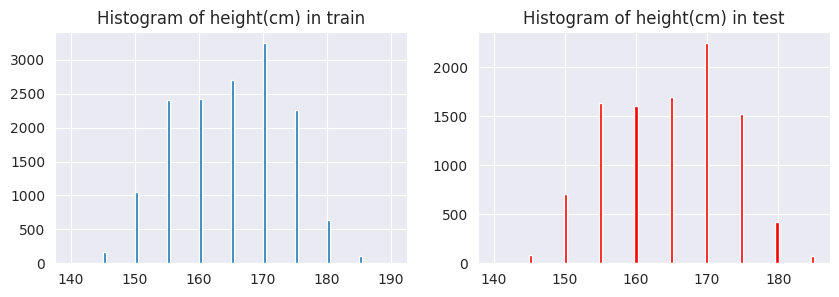

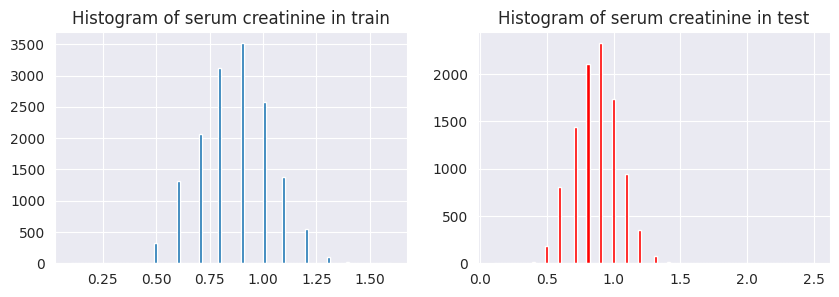

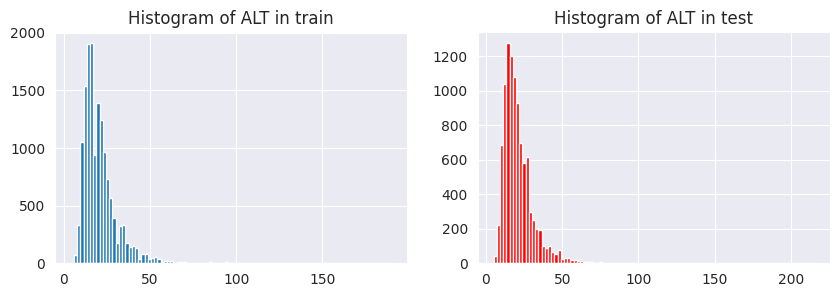

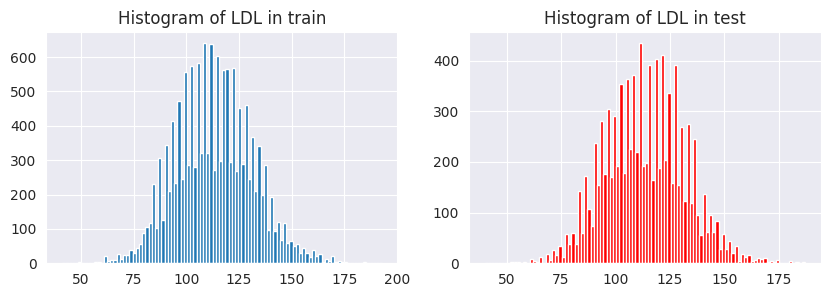

In [9]:
def features_histogram(train, test):
    for feature in features:
        plt.figure(figsize=(10, 3))
        plt.subplot(1, 2, 1)
        train[feature].hist(bins=100)
        plt.title(f"Histogram of {feature} in train")
        plt.subplot(1, 2, 2)
        test[feature].hist(bins=100, color='r')
        plt.title(f"Histogram of {feature} in test")
        plt.show()
features_histogram(train, test)

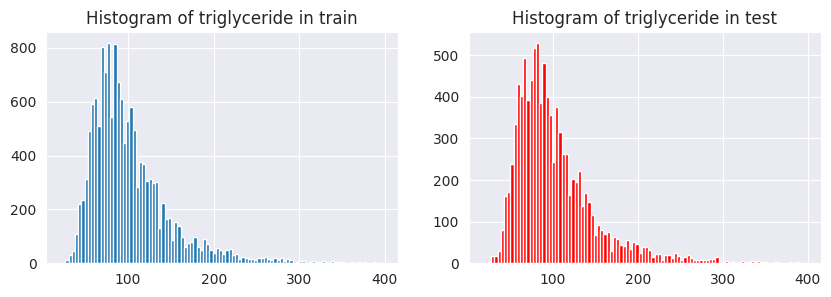

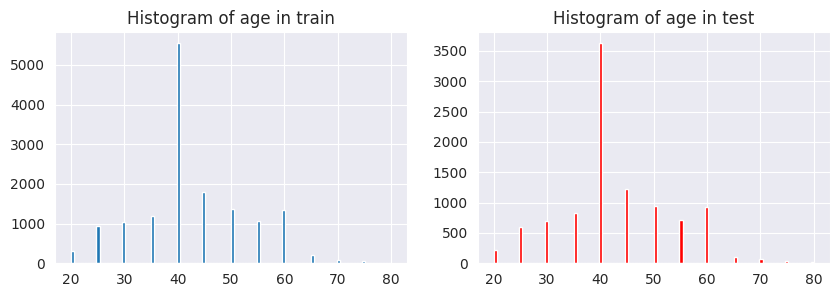

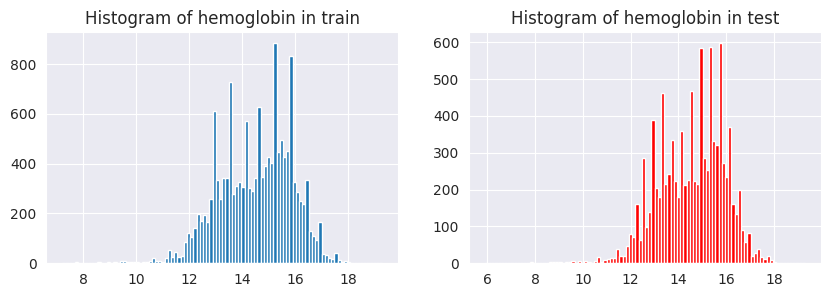

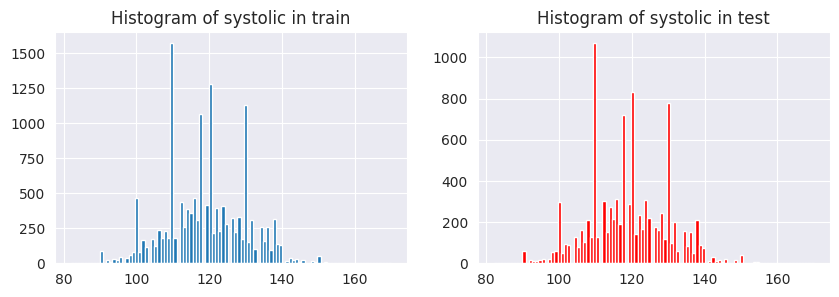

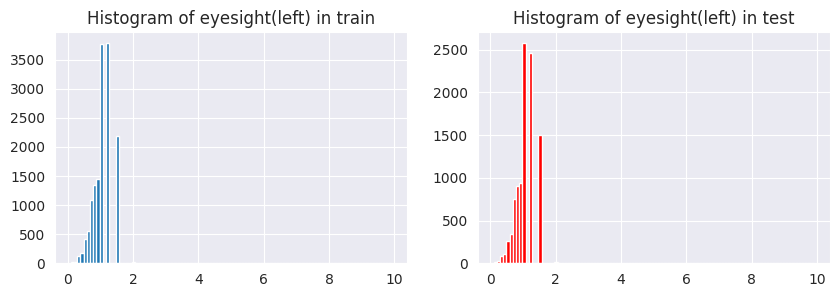

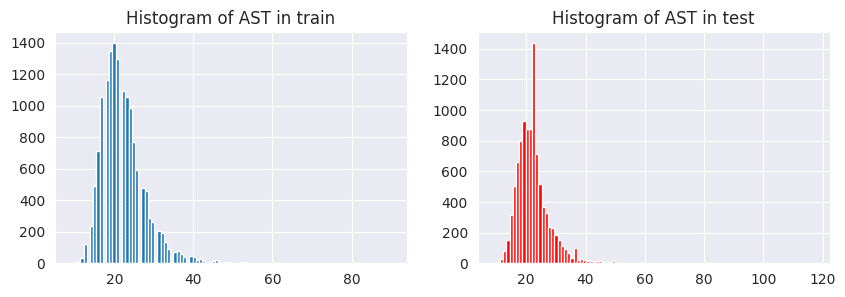

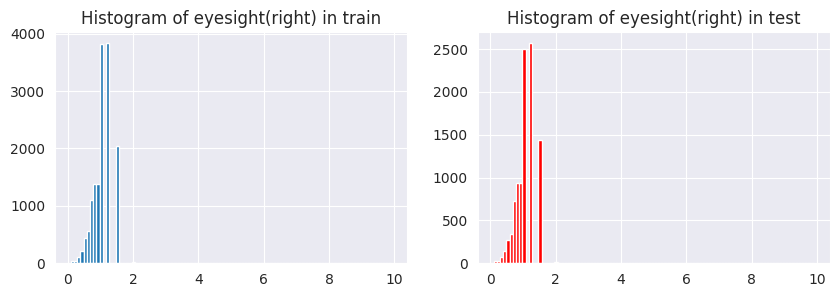

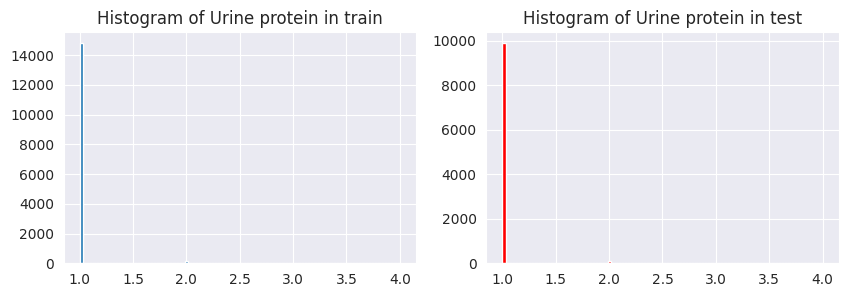

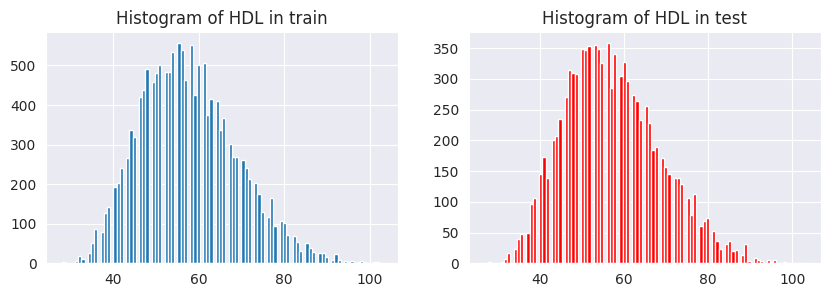

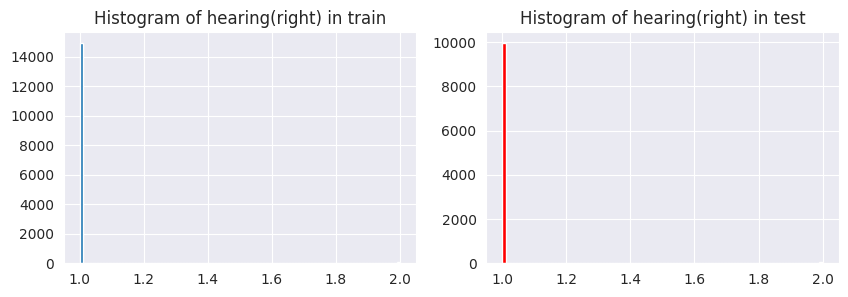

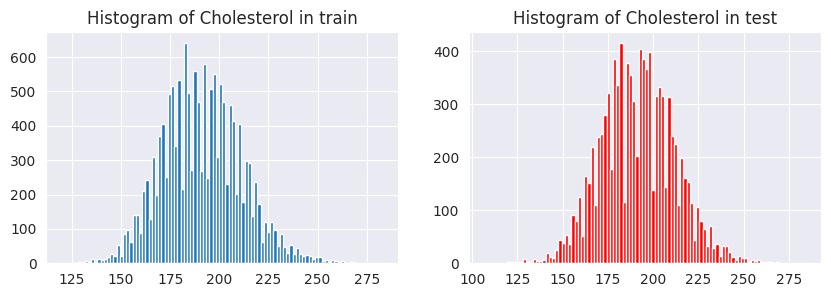

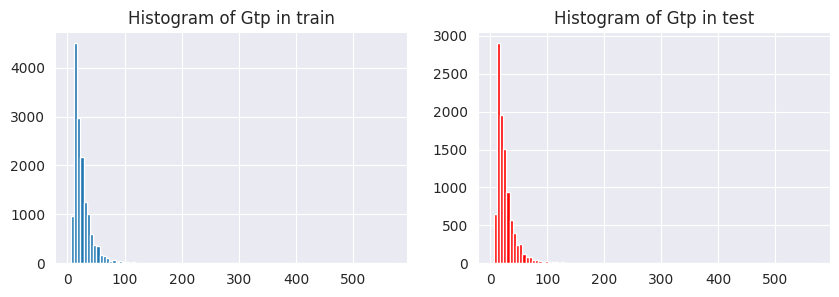

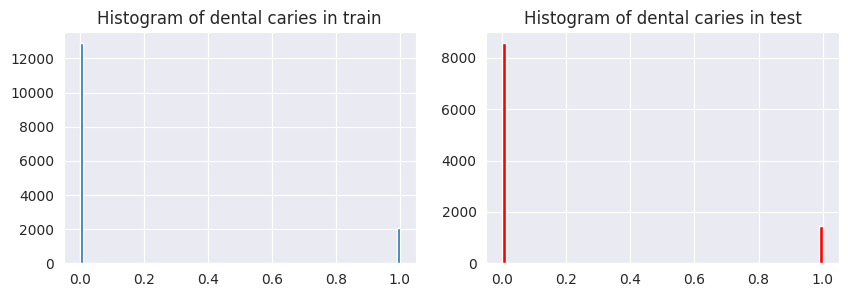

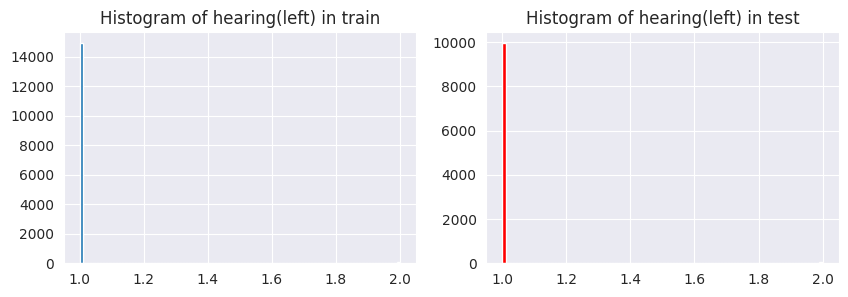

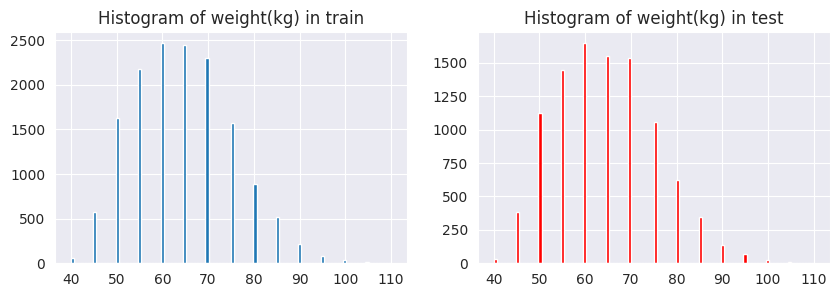

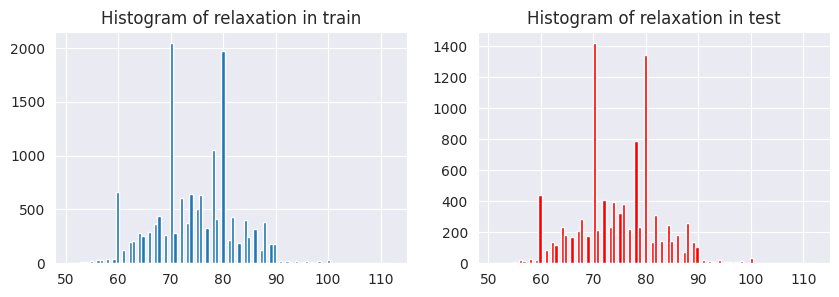

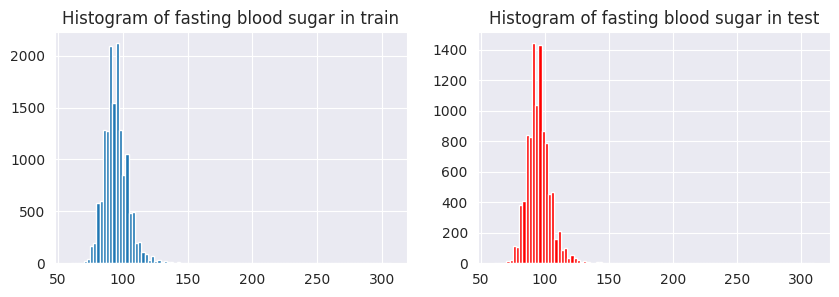

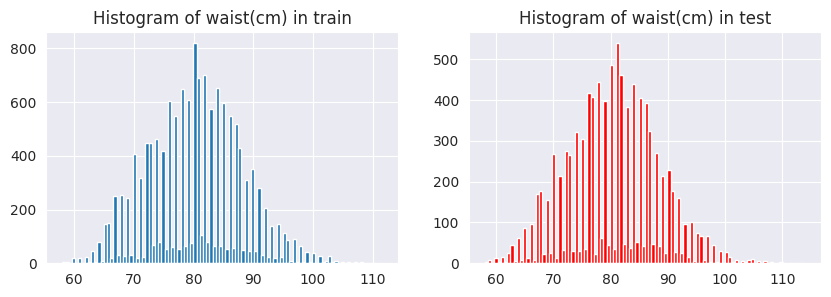

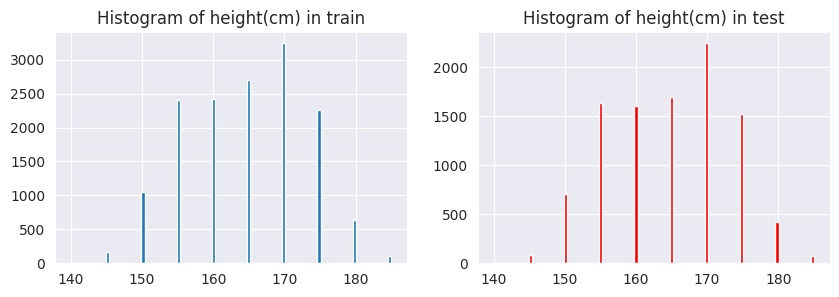

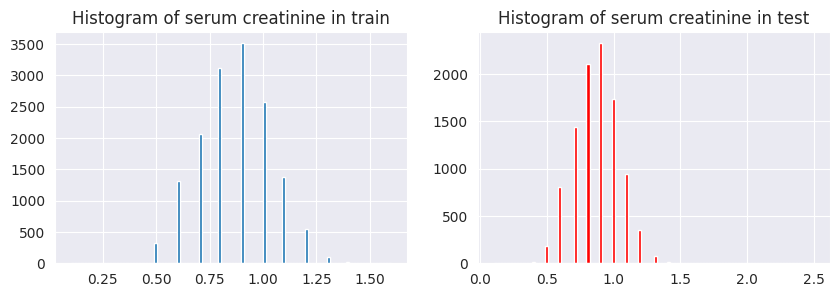

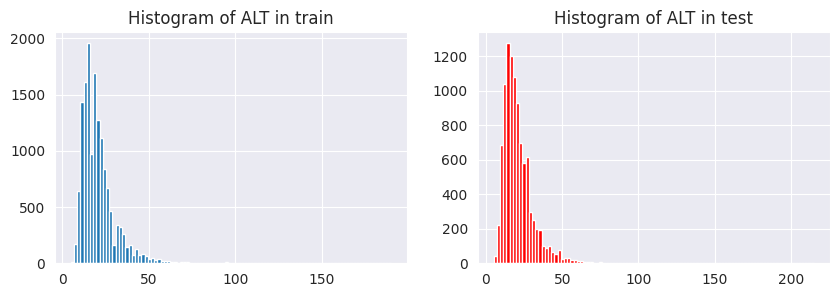

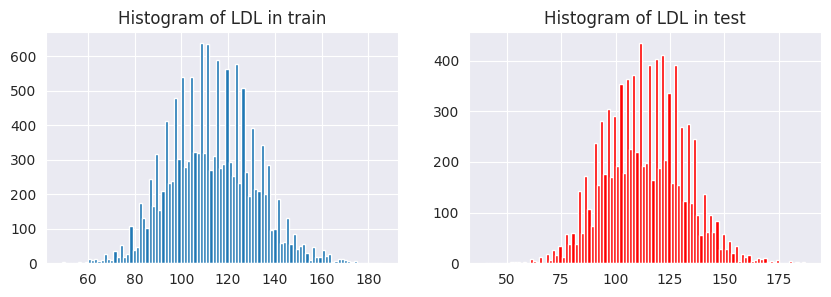

In [10]:
for feature in features:
    feature_min = test[feature].min()
    feature_max = test[feature].max()
    # adjust train data
    train = train[(train[feature] >= feature_min) & (train[feature] <= feature_max)]

train = train.reset_index(drop=True)
features_histogram(train, test)

### Checking statistic of train and test

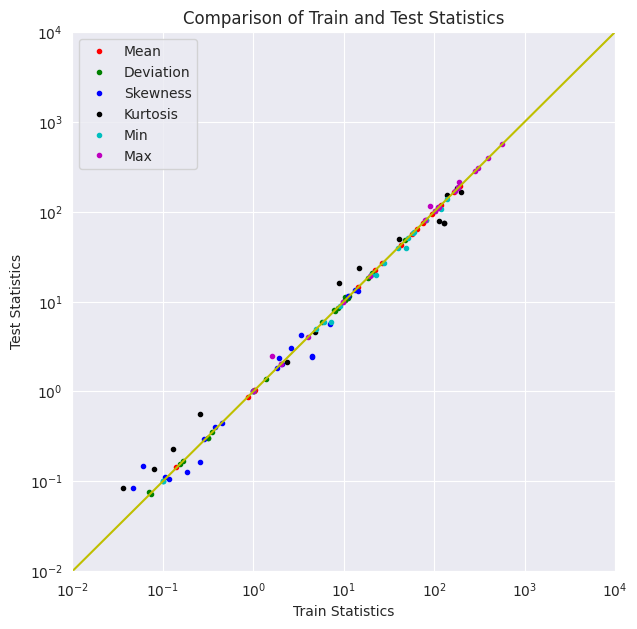

In [11]:
plt.figure(figsize=(7, 7))

plt.plot(train[features].mean(), test[features].mean(), 'r.', label='Mean')
plt.plot(train[features].std(), test[features].std(), 'g.', label='Deviation')
plt.plot(train[features].skew(), test[features].skew(), 'b.', label='Skewness')
plt.plot(train[features].kurtosis(), test[features].kurtosis(), 'k.', label='Kurtosis')
plt.plot(train[features].min(), test[features].min(), 'c.', label='Min')
plt.plot(train[features].max(), test[features].max(), 'm.', label='Max')

plt.plot([1e-2, 1e4], [1e-2, 1e4], 'y')
plt.title('Comparison of Train and Test Statistics')
plt.xlabel('Train Statistics')
plt.ylabel('Test Statistics')

plt.xlim(1e-2, 1e4)
plt.ylim(1e-2, 1e4)
plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.show()

### Матрица корреляции

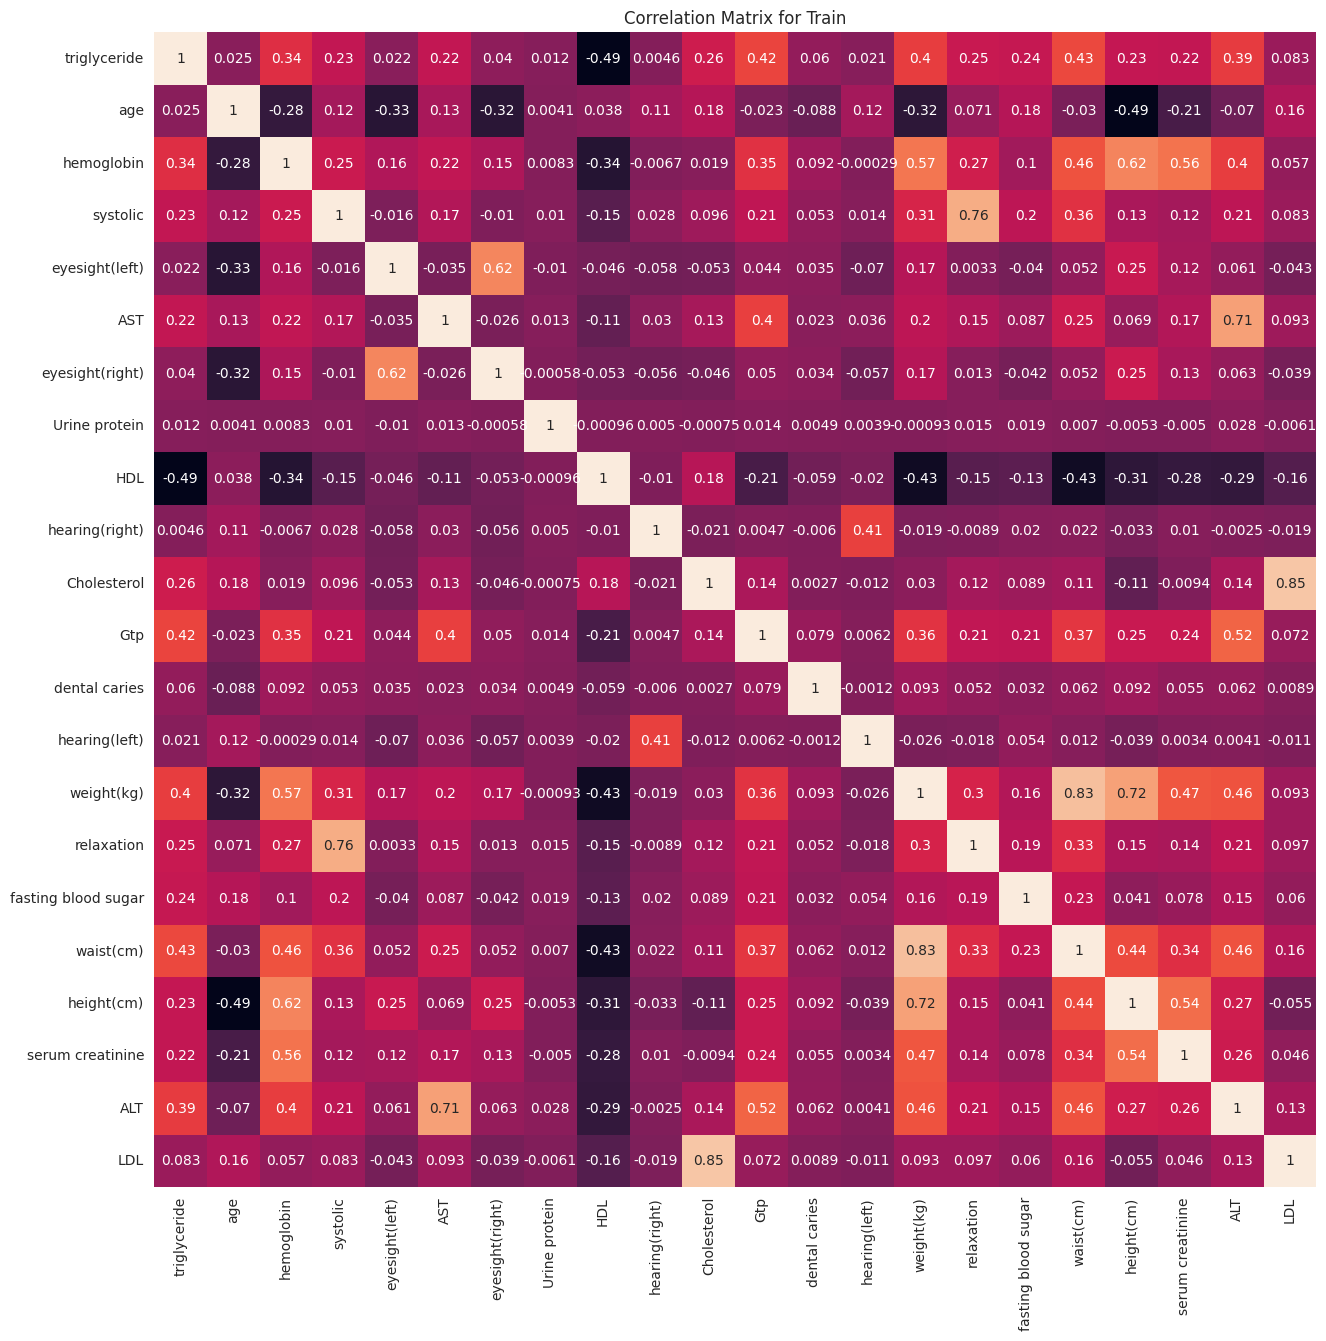

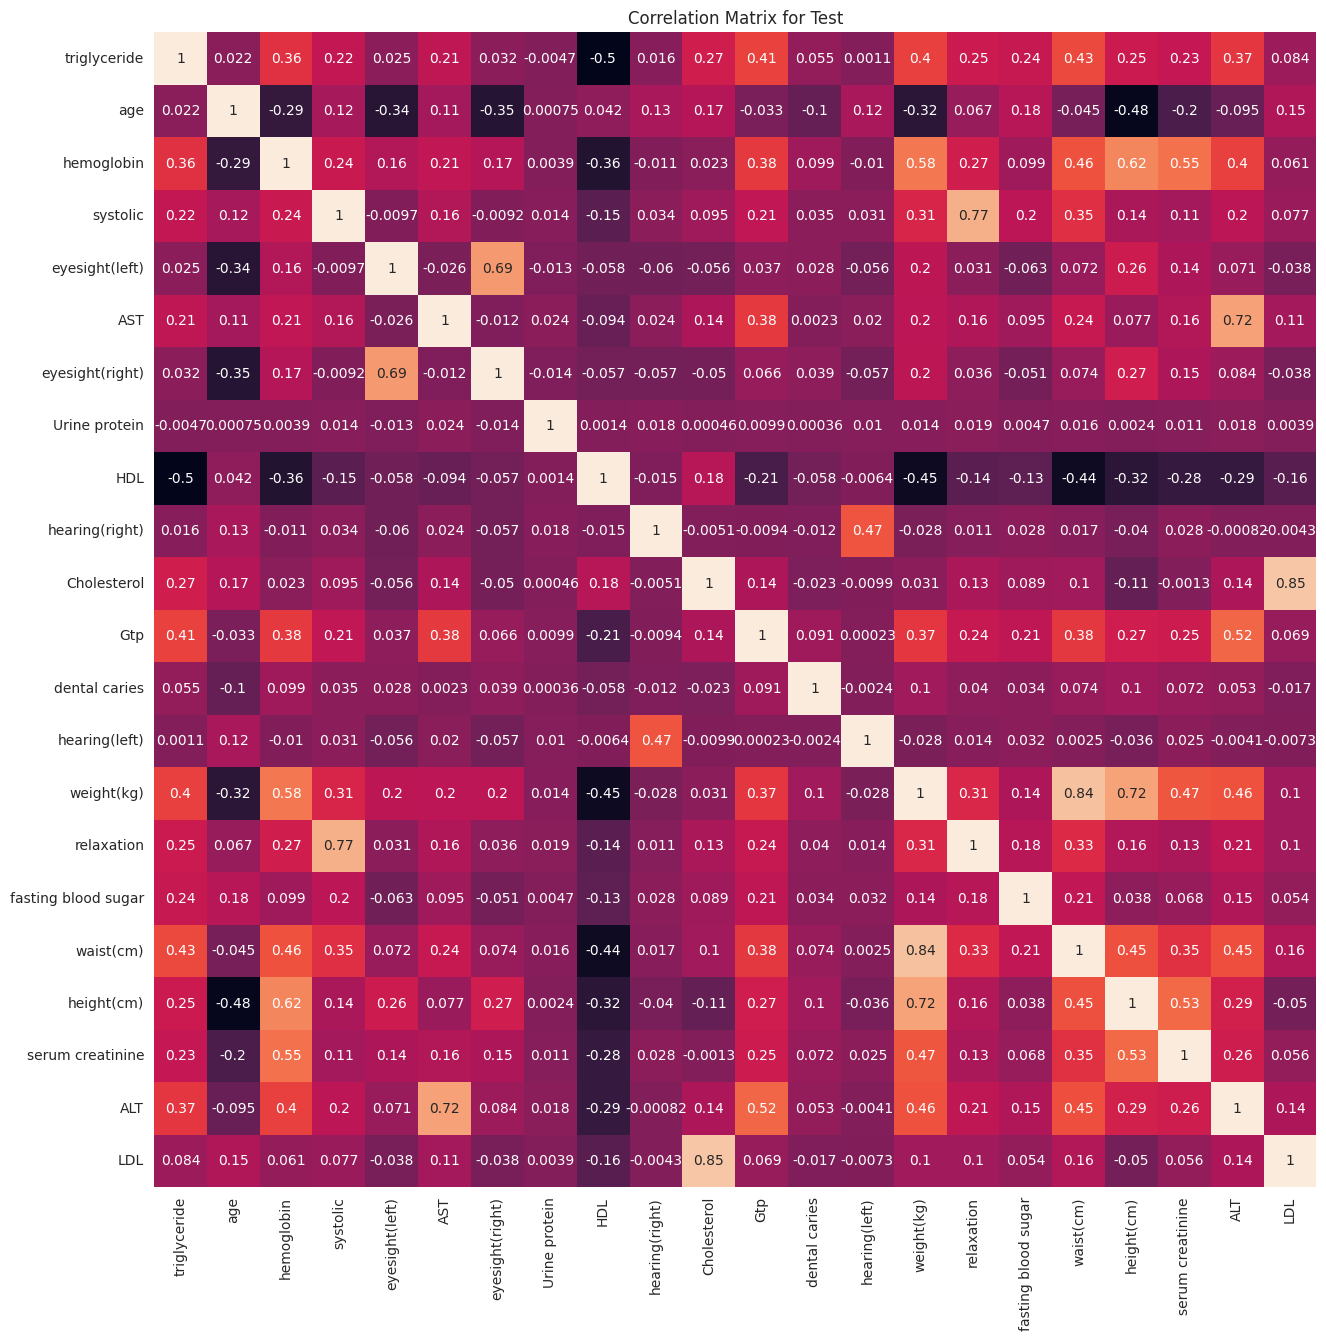

In [12]:
train_corr = train[features].corr()
test_corr = test[features].corr()

plt.figure(figsize=(15, 15))

sns.heatmap(train_corr, annot=True, cbar=False)
plt.title('Correlation Matrix for Train')
plt.show()

plt.figure(figsize=(15, 15))

sns.heatmap(test_corr, annot=True, cbar=False)
plt.title('Correlation Matrix for Test')
plt.show()

### Linear Correlation between test and train features

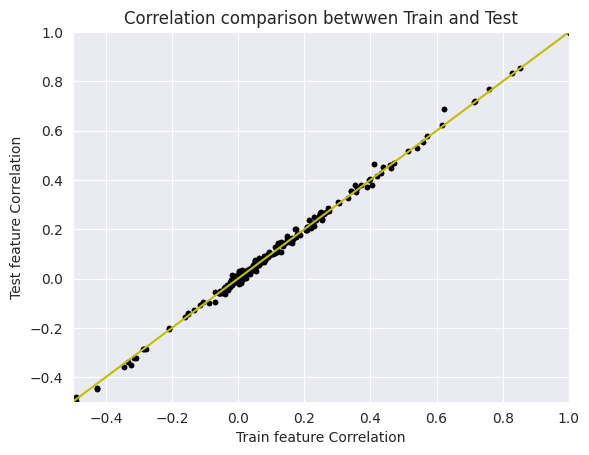

In [13]:
plt.plot(np.array(train_corr).flatten(), np.array(test_corr).flatten(), 'k.')
plt.plot([-0.5, 1], [-0.5, 1], 'y')
plt.xlim(-0.5, 1)
plt.ylim(-0.5, 1)

plt.xlabel('Train feature Correlation')
plt.ylabel('Test feature Correlation')

plt.title('Correlation comparison betwwen Train and Test')
plt.show()

In [14]:
sorted(train[features].nunique())

[2,
 2,
 2,
 4,
 10,
 13,
 13,
 14,
 14,
 15,
 57,
 62,
 74,
 75,
 96,
 107,
 109,
 133,
 148,
 168,
 327,
 353]

### Зависимости признаков между друг другом

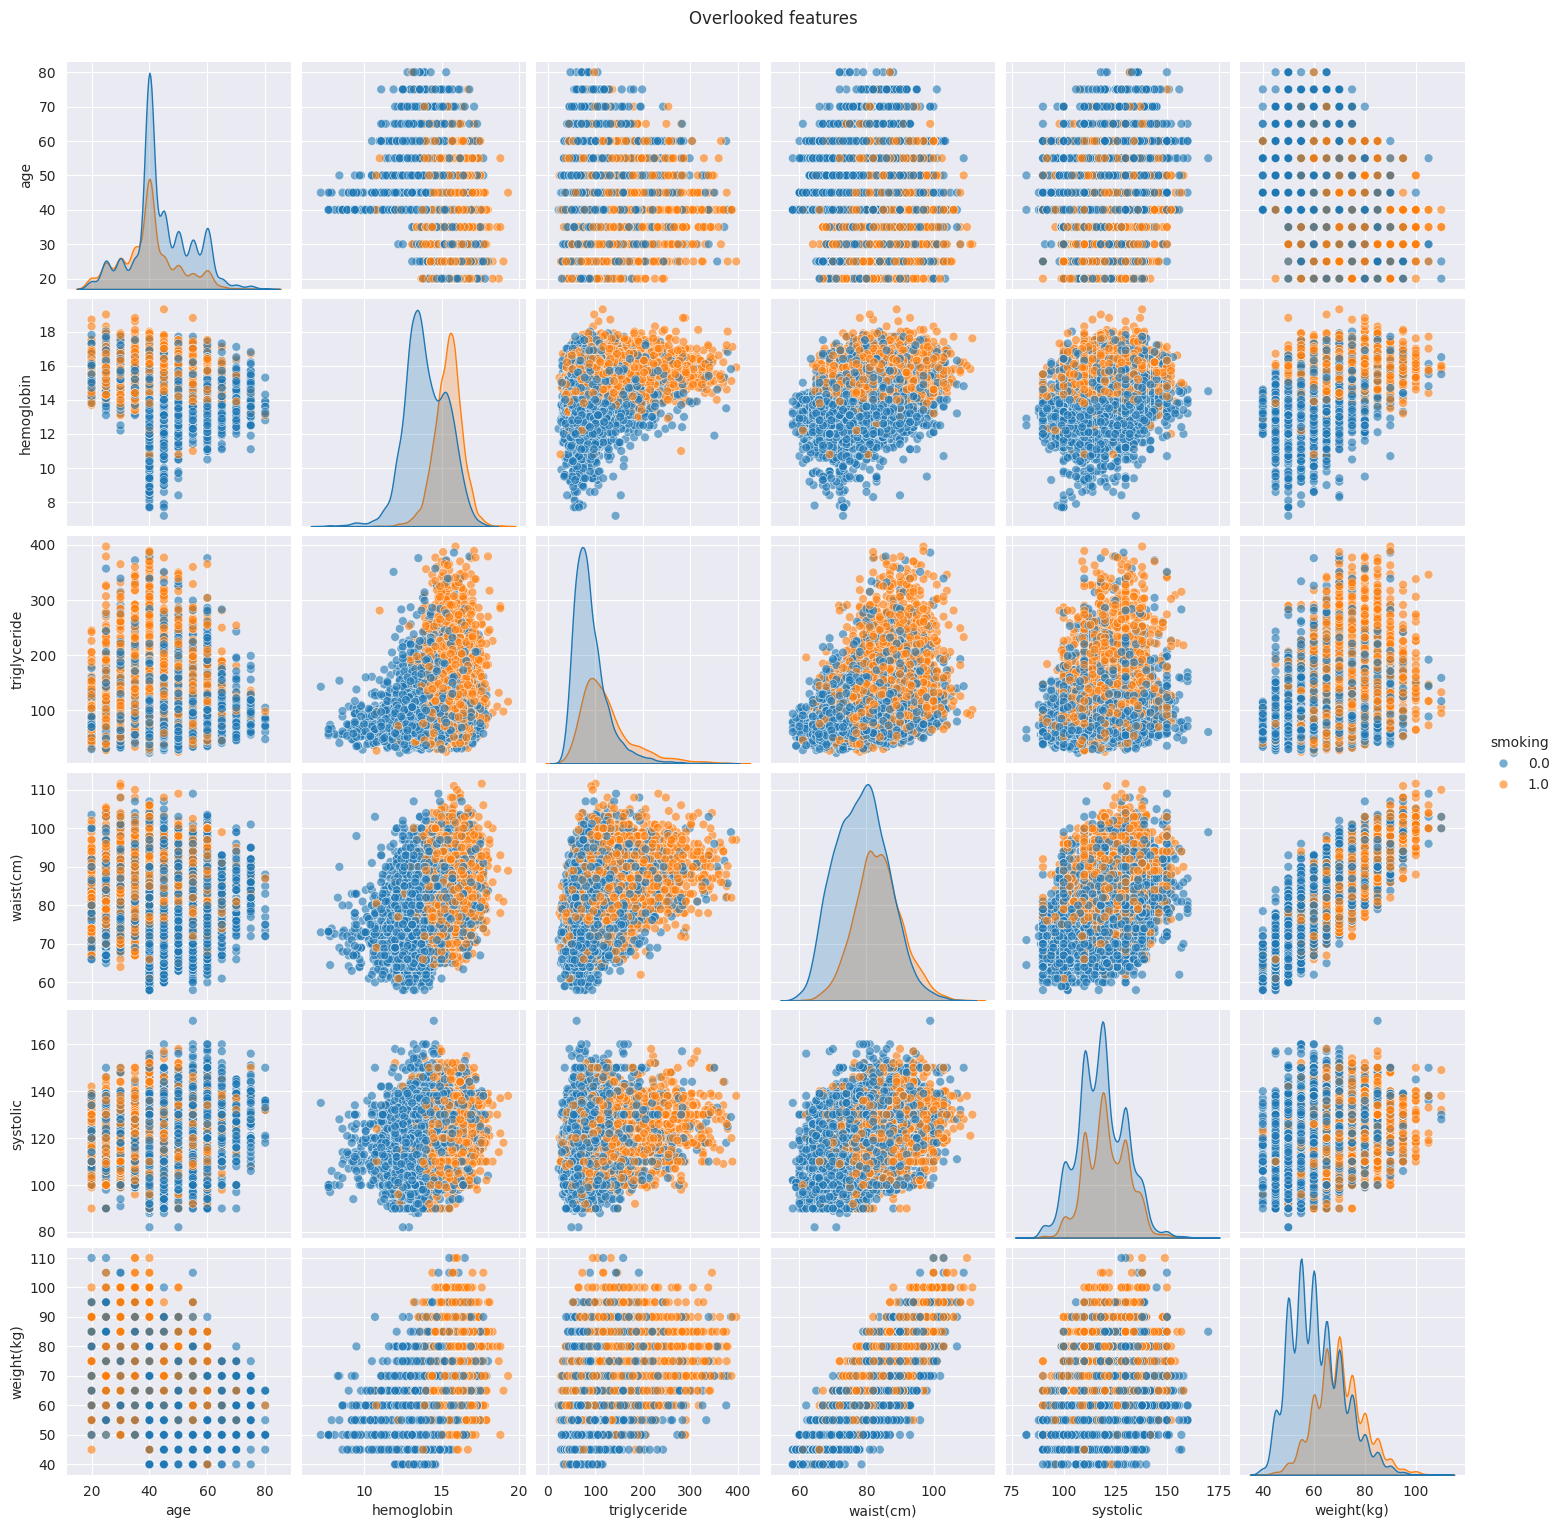

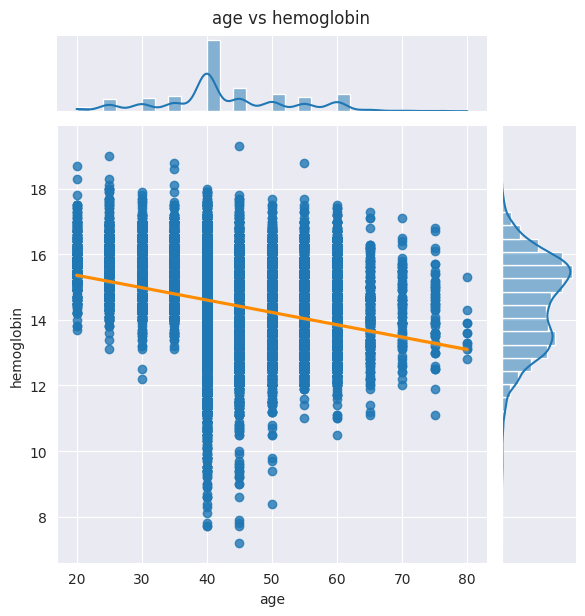

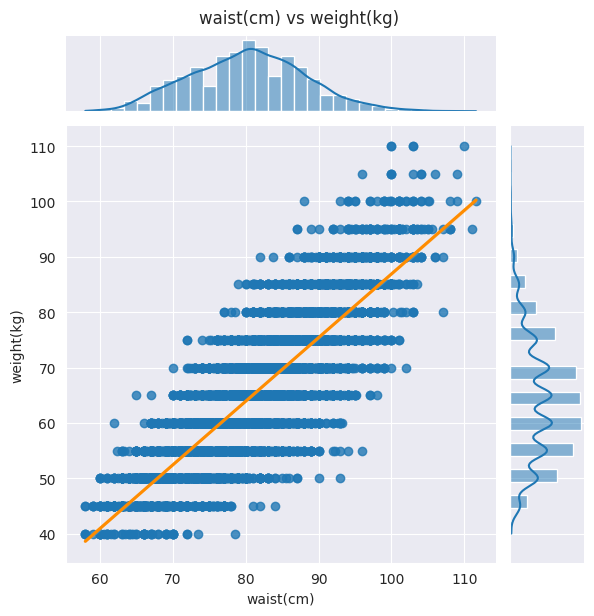

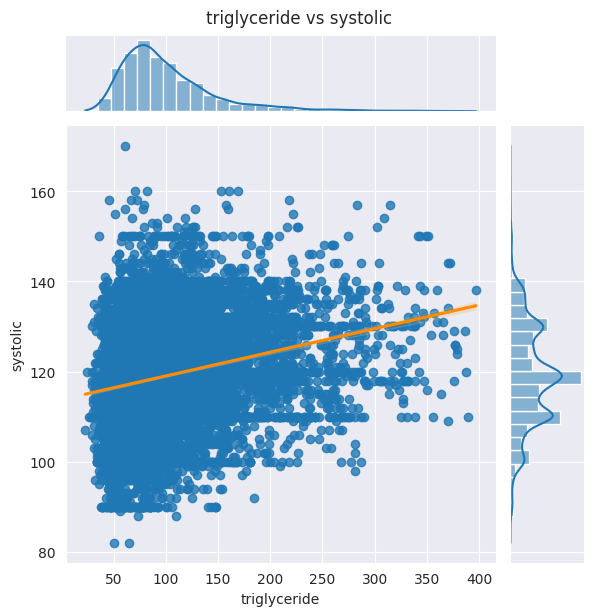

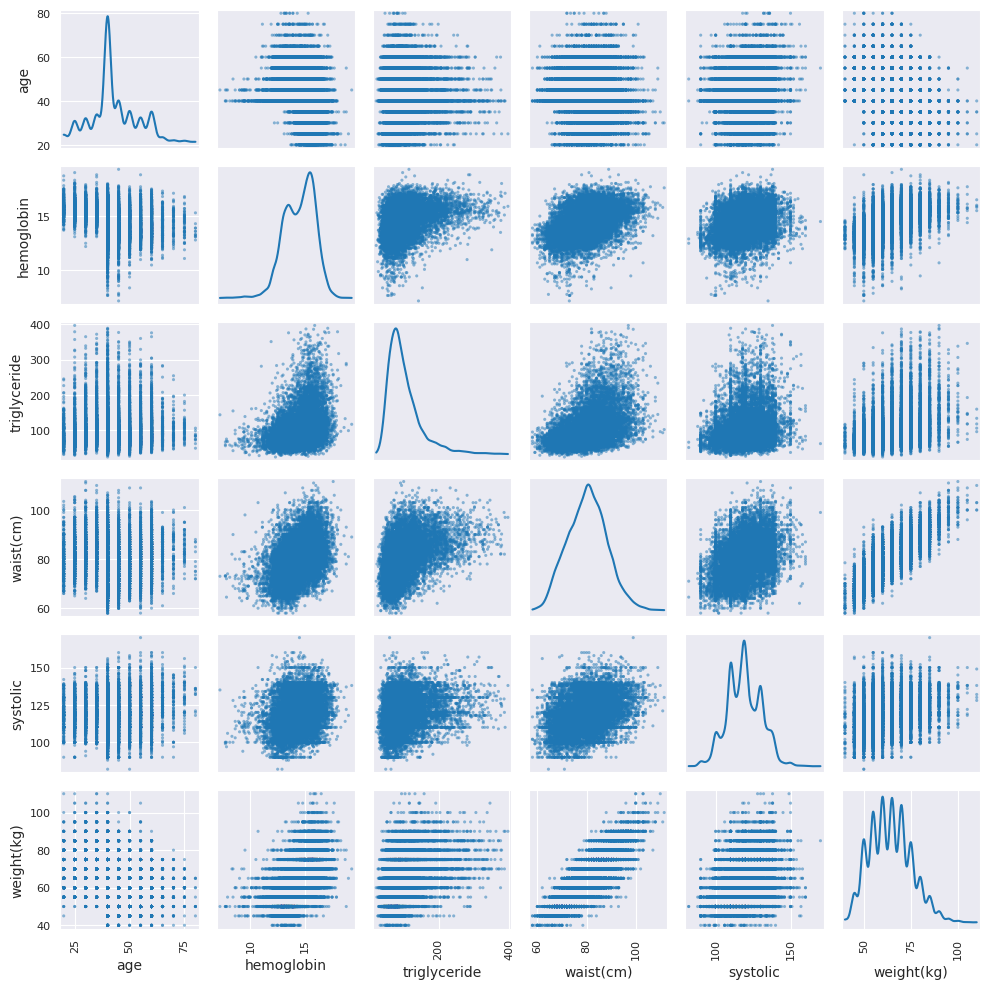

In [15]:
overlooked_features = ['age', 'hemoglobin', 'triglyceride', 'waist(cm)', 'systolic', 'weight(kg)']

sns.pairplot(
    train[overlooked_features + ['smoking']],
    hue='smoking',
    vars=overlooked_features,
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 40},
    diag_kws={'fill': True}
)
plt.suptitle('Overlooked features', y=1.02)
plt.show()

pairs_to_plot = [
    ('age', 'hemoglobin'),
    ('waist(cm)', 'weight(kg)'),
    ('triglyceride', 'systolic')
]

for x_col, y_col in pairs_to_plot:
    g = sns.jointplot(
        data=train,
        x=x_col,
        y=y_col,
        kind='reg',
        height=6,
        marginal_kws={'bins': 30, 'fill': True},
        line_kws={'color': 'darkorange'}
    )
    g.fig.suptitle(f'{x_col} vs {y_col}', y=1.02)
    plt.show()

pd.plotting.scatter_matrix(
    train[overlooked_features],
    figsize=(10, 10),
    diagonal='kde',
    alpha=0.5,
    s=20
)
plt.tight_layout()
plt.show()

### Выводы

В результате EDA было выявлено, что классы целевой переменной сбалансированы, что позволяет использовать стандартную кросс-валидацию без введения весов. Пропусков в данных почти нет, поэтому можно безопасно применять медианное заполнение. Дубликатов как внутри, так и между train и test не обнаружено, утечки отсутствуют. Основные статистики признаков (среднее, стандартное отклонение, асимметрия, эксцесс, минимум и максимум) совпадают в train и test, что говорит об отсутствии сдвига распределений.

### Подготовка данных

In [16]:
from normalization import impute_median, normalize_zscore
from feature_pruning import auto_prune_correlated_features
from cross_validation import train_test_split_stratified
from sklearn.preprocessing import OneHotEncoder

TARGET = 'smoking'
ID_COL = 'id'
overlooked_features = [column for column in train.columns if column not in {ID_COL, TARGET}]

X = train[overlooked_features].copy()
X_test = test[overlooked_features].copy()
y = train[TARGET].values

#Imputation
X = impute_median(X)
X_test = impute_median(X_test)

# One-Hot Encoding
cateogorical_cols = [column for column in overlooked_features if X[column].nunique() <= 10]
encorder = OneHotEncoder(sparse_output=False, drop='first')
encorder.fit(pd.concat([X[cateogorical_cols], X_test[cateogorical_cols]], axis=0))

X_ohe      = pd.DataFrame(encorder.transform(X[cateogorical_cols]),
                          columns=encorder.get_feature_names_out(cateogorical_cols),
                          index=X.index)
X_test_ohe = pd.DataFrame(encorder.transform(X_test[cateogorical_cols]),
                          columns=encorder.get_feature_names_out(cateogorical_cols),
                          index=X_test.index)

X      = pd.concat([X.drop(columns=cateogorical_cols),      X_ohe], axis=1)
X_test = pd.concat([X_test.drop(columns=cateogorical_cols), X_test_ohe], axis=1)

# Drop too correlated data
df_prune = X.copy()
df_prune[TARGET] = y
corr = df_prune.drop(columns=[TARGET]).corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
feature_pairs = [(c1, c2) for c1 in upper.columns for c2 in upper.index if upper.loc[c2, c1] > 0.8]
all_feats = X.columns.tolist()

selected = auto_prune_correlated_features(
    df=df_prune,
    target_column=TARGET,
    feature_pairs=feature_pairs,
    all_features=all_feats,
    threshold=0.8,
    verbose=True
)

X      = X[selected]
X_test = X_test[selected]

# Normalization
numeric_cols = [c for c in X.columns if c not in encorder.get_feature_names_out()]
X_norm, (mu, sigma)       = normalize_zscore(X[numeric_cols])
X[numeric_cols]           = X_norm
X_test[numeric_cols]      = (X_test[numeric_cols] - mu) / sigma

# Split
X_tr, X_val, y_tr, y_val = train_test_split_stratified(
    X, y, test_size=0.2, random_state=42
)

print(X_tr.shape, X_val.shape, X_test.shape)

waist(cm) vs weight(kg) → MSE_A=0.1471, MSE_B=0.1470 → drop f1
LDL vs Cholesterol → MSE_A=0.1470, MSE_B=0.1470 → drop f2
(11983, 30) (2996, 30) (10000, 30)


# Закончили EDA

In [17]:
from ensemble_manual import BaggingClassifierManual
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import roc_auc_score

bag_manual = BaggingClassifierManual(
    base_estimator=RandomForestClassifier(max_depth=3, random_state=42),
    n_estimators=50,
    max_samples=0.8,
    random_state=42
).fit(X_tr.values, y_tr)

bag_sklearn = BaggingClassifier(
    estimator=RandomForestClassifier(max_depth=3, random_state=42),
    n_estimators=50,
    max_samples=0.8,
    random_state=42,
    n_jobs=-1
).fit(X_tr, y_tr)

p_manual = bag_manual.predict_proba(X_val.values)[:,1]
p_sklearn = bag_sklearn.predict_proba(X_val)[:,1]


print("Manual Bagging ROC-AUC:", roc_auc_score(y_val, p_manual))
print("Sklearn Bagging ROC-AUC:", roc_auc_score(y_val, p_sklearn))

Manual Bagging ROC-AUC: 0.8500621879804453
Sklearn Bagging ROC-AUC: 0.8506538375166265


In [18]:
from ensemble_manual import GradientBoostingClassifierManual
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor

base_tree = DecisionTreeRegressor(max_depth=7, random_state=42)
gb_manual = GradientBoostingClassifierManual(
    base_estimator=base_tree,
    n_estimators=100, learning_rate=0.1
).fit(X_tr.values, y_tr)
p_manual = gb_manual.predict_proba(X_val.values)[:,1]

gb_sklearn = GradientBoostingClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=7, random_state=42
).fit(X_tr, y_tr)
p_skl = gb_sklearn.predict_proba(X_val)[:,1]

print("Manual GB AUC:", roc_auc_score(y_val, p_manual))
print("Sklearn GB AUC:", roc_auc_score(y_val, p_skl))

Manual GB AUC: 0.8748865165325977
Sklearn GB AUC: 0.8810832416828374


In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from ensemble_manual import GradientBoostingClassifierManual

best_auc = -1
best_depth = None
best_model = None

for depth in range(1, 11):
    base_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    gb_manual = GradientBoostingClassifierManual(
        base_estimator=base_tree,
        n_estimators=100,
        learning_rate=0.1
    ).fit(X_tr.values, y_tr)

    p_manual = gb_manual.predict_proba(X_val.values)[:, 1]
    auc = roc_auc_score(y_val, p_manual)

    print(f"Depth {depth}: AUC = {auc:.4f}")

    if auc > best_auc:
        best_auc = auc
        best_depth = depth
        best_model = gb_manual

print(f"\nBest manual GB depth: {best_depth} with AUC = {best_auc:.4f}")

Depth 1: AUC = 0.8384
Depth 2: AUC = 0.8511
Depth 3: AUC = 0.8603
Depth 4: AUC = 0.8650
Depth 5: AUC = 0.8695
Depth 6: AUC = 0.8732
Depth 7: AUC = 0.8749
Depth 8: AUC = 0.8742
Depth 9: AUC = 0.8729
Depth 10: AUC = 0.8713

Best manual GB depth: 7 with AUC = 0.8749


In [21]:
import numpy as np
from metrics import (
    accuracy_manual, precision_manual,
    recall_manual, f1_score_manual,
    roc_auc_score_manual, average_precision_score_manual
)
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score,
    roc_auc_score, average_precision_score
)

y_true  = np.array([0, 0, 1, 1, 0, 1, 1, 0])
y_pred  = np.array([0, 1, 1, 1, 0, 0, 1, 0])

y_score = y_pred.astype(float)

print("       Metric |  Manual  |  Sklearn")
print("-----------------------------------")
print(f"Accuracy     | {accuracy_manual(y_true, y_pred):7.4f} | {accuracy_score(y_true, y_pred):7.4f}")
print(f"Precision    | {precision_manual(y_true, y_pred):7.4f} | {precision_score(y_true, y_pred):7.4f}")
print(f"Recall       | {recall_manual(y_true, y_pred):7.4f} | {recall_score(y_true, y_pred):7.4f}")
print(f"F1-Score     | {f1_score_manual(y_true, y_pred):7.4f} | {f1_score(y_true, y_pred):7.4f}")
print(f"ROC-AUC      | {roc_auc_score_manual(y_true, y_score):7.4f} | {roc_auc_score(y_true, y_score):7.4f}")
print(f"PR-AUC (AP)  | {average_precision_score_manual(y_true, y_score):7.4f} | {average_precision_score(y_true, y_score):7.4f}")


       Metric |  Manual  |  Sklearn
-----------------------------------
Accuracy     |  0.7500 |  0.7500
Precision    |  0.7500 |  0.7500
Recall       |  0.7500 |  0.7500
F1-Score     |  0.7500 |  0.7500
ROC-AUC      |  0.7500 |  0.7500
PR-AUC (AP)  |  0.5193 |  0.6875


In [23]:
from metrics import (
    accuracy_manual, precision_manual,
    recall_manual, f1_score_manual,
    roc_auc_score_manual, average_precision_score_manual
)
from ensemble_manual import GradientBoostingClassifierManual
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier

models = {
    'LightGBM':   LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'XGBoost':    XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, eval_metric='logloss'),
    'CatBoost':   CatBoostClassifier(iterations=100, learning_rate=0.1, random_seed=42, verbose=0),
    'SklearnHGB': HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, random_state=42),
    'SklearnGB':  GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'GB_Manual':  GradientBoostingClassifierManual(
                      base_estimator=DecisionTreeRegressor(max_depth=3, random_state=42),
                      n_estimators=100, learning_rate=0.1
                   )
}

for name, mdl in models.items():
    if name == 'GB_Manual':
        mdl.fit(X_tr.values, y_tr)
    else:
        mdl.fit(X_tr, y_tr)

metrics = [
    ('Accuracy', accuracy_manual,      lambda y, y_s, y_p: y_p),
    ('Precision', precision_manual,    lambda y, y_s, y_p: y_p),
    ('Recall', recall_manual,          lambda y, y_s, y_p: y_p),
    ('F1', f1_score_manual,            lambda y, y_s, y_p: y_p),
    ('ROC-AUC', roc_auc_score_manual,  lambda y, y_s, y_p: y_s),
    ('PR-AUC', average_precision_score_manual, lambda y, y_s, y_p: y_s),
]

results = {name: {} for name in models}

for name, mdl in models.items():
    if name == 'GB_Manual':
        y_score = mdl.predict_proba(X_val.values)[:,1]
        y_pred  = mdl.predict(X_val.values)
    else:
        y_score = mdl.predict_proba(X_val)[:,1]
        y_pred  = mdl.predict(X_val)
    for mname, mfunc, selector in metrics:
        arr = selector(y_val, y_score, y_pred)
        if mname in ('ROC-AUC', 'PR-AUC'):
            val = mfunc(y_val, y_score)
        else:
            val = mfunc(y_val, y_pred)
        results[name][mname] = val

print(f"{'Model':<12}", "  ".join(f"{m[0]:>9}" for m in metrics))
print("-" * (12 + 11 * len(metrics)))
for name, res in results.items():
    print(f"{name:<12}", "  ".join(f"{res[m[0]]:9.4f}" for m in metrics))

best_by_metric = {}
for mname, _, _ in metrics:
    best_model = max(results, key=lambda nm: results[nm][mname])
    best_by_metric[mname] = (best_model, results[best_model][mname])

print("\nBest by metric:")
for mname, (mdl, val) in best_by_metric.items():
    print(f"{mname:<9} -> {mdl} ({val:.4f})")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4393, number of negative: 7590
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1099
[LightGBM] [Info] Number of data points in the train set: 11983, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.366603 -> initscore=-0.546819
[LightGBM] [Info] Start training from score -0.546819
Model         Accuracy  Precision     Recall         F1    ROC-AUC     PR-AUC
------------------------------------------------------------------------------
LightGBM        0.7981     0.7046     0.7732     0.7373     0.8804     0.7679
XGBoost         0.8027     0.7076     0.7869     0.7451     0.8804     0.7682
CatBoost        0.7951     0.6921     0.7942     0.7396     0.8797     0.7694
SklearnHGB      0.7977     0.7003    

__OPTUNA__

In [ ]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

def objective(trial):
    params = {
        'n_estimators':       trial.suggest_int('n_estimators', 50, 500),
        'max_depth':          trial.suggest_int('max_depth', 3, 12),
        'num_leaves':         trial.suggest_int('num_leaves', 20, 200),
        'learning_rate':      trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
        'min_child_samples':  trial.suggest_int('min_child_samples', 5, 100),
        'subsample':          trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree':   trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'reg_alpha':          trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
        'reg_lambda':         trial.suggest_loguniform('reg_lambda', 1e-8, 10.0),
        'random_state':       42,
        'objective':          'binary',
        'verbosity':          -1
    }
    model = LGBMClassifier(**params)
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_tr, y_tr, cv=cv, scoring='roc_auc', n_jobs=-1)
    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, timeout=600)

print("Best ROC-AUC:", study.best_value)
print("Best params:", study.best_params)

best_params = study.best_params
final_model = LGBMClassifier(**best_params)
final_model.fit(
    np.vstack([X_tr, X_val]),
    np.concatenate([y_tr, y_val])
)
final_preds = final_model.predict_proba(X_test)[:, 1]


[I 2025-05-17 20:18:00,808] A new study created in memory with name: no-name-cd0282bf-5700-425a-867a-ff3792b09cd4
/tmp/ipykernel_60013/2063762654.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate':      trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
/tmp/ipykernel_60013/2063762654.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample':          trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_60013/2063762654.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree':   trial.suggest_unif